In [1]:
import sys
sys.path.insert(1, 'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\frxas.py') #\\impedance')


from frxas import models
import matplotlib.pyplot as plt
import numpy as np

import lmfit
from lmfit import Parameters, minimize, report_fit

%reload_ext autoreload
%autoreload 2

### Simulate some data sets

In [2]:
np.random.seed(121)

# Give x arrays different end points and different length vectors since that
# is the case for real data.

x = []
x.append(np.linspace(0, 80 , 20))
x.append(np.linspace(0, 60 , 26))
x.append(np.linspace(0, 70 , 18))

data = []
for i in np.arange(2):
    params = Parameters()
    ld = 10 + 30 * np.random.rand()
    tg = 1 + 2.5 * np.random.rand()
    Ao = 1 + 2 * np.random.rand()
    f =  i + 1
    dat = models.chi_ideal(x[i], ld, tg, Ao, f) +\
        np.random.normal(size=x[i].size, scale=0.001)
    data.append(dat)
    print('ld_%i : %.3f tg_%i : %.3f Ao_%i : %.1f f_%i : %.1f' % \
          (i+1, ld, i+1, tg, i+1, Ao, i+1, f))
data = np.array(data)

ld_1 : 13.340 tg_1 : 1.527 Ao_1 : 1.5 f_1 : 1.0
ld_2 : 32.355 tg_2 : 2.279 Ao_2 : 1.9 f_2 : 2.0


Create sets of parameters for each data set. These parameters should be
adjusted based on the details of each model. Looping through this way sets
the initial value of each parameter to be the same across data sets, which
may not be desirable. Note: frequencies, f, are independent variables so
they should 

In [3]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('ld_%i' % (iy+1), value=20, min=0.0, max=200)
    fit_params.add('tg_%i' % (iy+1), value=3, min=0.01, max=100.0)
    fit_params.add('Ao_%i' % (iy+1), value=1.5, min=0.01, max=100.0)
    fit_params.add('f_%i' % (iy+1), value= iy +1, vary=False)

#### Now use lmfit's minimize function to fit this model to the data and report
#### fitting results!

In [4]:
out = minimize(models.objective_fun, fit_params, args=(x, data, models.chi_ideal))
report_fit(out.params)

[[Variables]]
    ld_1:  13.2124220 +/- 0.18839378 (1.43%) (init = 20)
    tg_1:  1.49819235 +/- 0.04249491 (2.84%) (init = 3)
    Ao_1:  1.46615786 +/- 0.00157953 (0.11%) (init = 1.5)
    f_1:   1 (fixed)
    ld_2:  33.1956992 +/- 1.27842066 (3.85%) (init = 20)
    tg_2:  2.39402286 +/- 0.18315039 (7.65%) (init = 3)
    Ao_2:  1.94046075 +/- 0.00234651 (0.12%) (init = 1.5)
    f_2:   2 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(ld_2, tg_2) =  0.999
    C(ld_1, tg_1) =  0.994
    C(ld_2, Ao_2) =  0.475
    C(tg_2, Ao_2) =  0.463
    C(ld_1, Ao_1) =  0.338
    C(tg_1, Ao_1) =  0.307


#### Finally, plot the results.

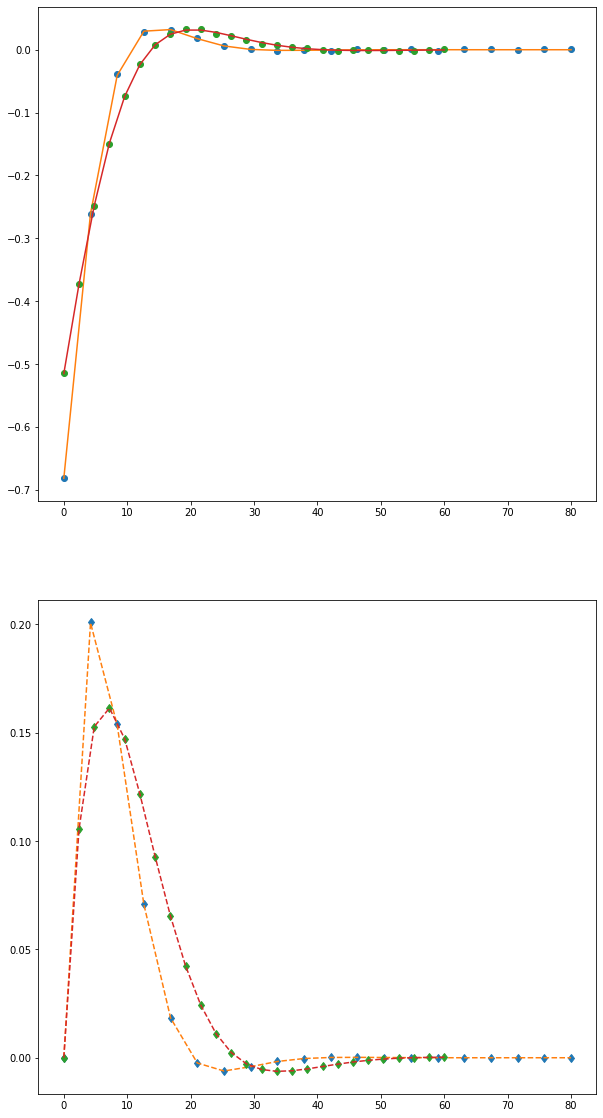

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,20))
for i in range(2):
    y_fit = models.dataset_fun(out.params, i, x[i], models.chi_ideal)
    ax1.plot(x[i], data[i].real, 'o', x[i], y_fit.real, '-')
    ax2.plot(x[i], data[i].imag, 'd', x[i], y_fit.imag, '--')
plt.show()

In [12]:
data_dum1 = models.chi_ideal(x[0], 19, 1.4, 1.1, 1.5)
data_dum1

array([-9.09090909e-01+0.00000000e+00j, -4.29626046e-01+2.62258921e-01j,
       -1.27378677e-01+2.47881179e-01j,  1.13122384e-02+1.53892646e-01j,
        4.97417267e-02+6.94645088e-02j,  4.35468313e-02+1.84784057e-02j,
        2.59104777e-02-3.82991467e-03j,  1.11401255e-02-9.28475351e-03j,
        2.58618647e-03-7.60162614e-03j, -9.70751323e-04-4.33851776e-03j,
       -1.71036254e-03-1.77028724e-03j, -1.31899891e-03-3.43204038e-04j,
       -7.22353067e-04+2.18316821e-04j, -2.78394774e-04+3.11561941e-04j,
       -4.16853221e-05+2.27553302e-04j,  4.59456616e-05+1.19564690e-04j,
        5.62059955e-05+4.32502899e-05j,  3.90393674e-05+4.22502004e-06j,
        1.96684160e-05-9.26556808e-06j,  6.62209452e-06-1.00528416e-05j])

In [13]:
data_dum2 =  models.chi_ideal(x[0], 20, 1.5, 1.2, 1.5)
data_dum2

array([-9.09090909e-01+0.00000000e+00j, -6.17618817e-01+1.99470905e-01j,
       -3.75830797e-01+2.71033366e-01j, -1.95862591e-01+2.66598878e-01j,
       -7.45686726e-02+2.24097909e-01j, -1.48940288e-03+1.68609502e-01j,
        3.59840875e-02+1.14876843e-01j,  4.96529412e-02+7.01495537e-02j,
        4.91253244e-02+3.67635039e-02j,  4.14413715e-02+1.41974347e-02j,
        3.12696406e-02+5.52480451e-04j,  2.13652144e-02-6.48577731e-03j,
        1.30920180e-02-9.09422445e-03j,  6.89902785e-03-9.05106491e-03j,
        2.70109984e-03-7.66288967e-03j,  1.53699201e-04-5.79868925e-03j,
       -1.16791650e-03-3.97324192e-03j, -1.66526071e-03-2.44308197e-03j,
       -1.66740213e-03-1.29439457e-03j, -1.41681429e-03-5.13528653e-04j,
       -1.07523371e-03-3.80069033e-05j, -7.38832426e-04+2.10104469e-04j,
       -4.55847788e-04+3.04854051e-04j, -2.42803724e-04+3.07133166e-04j,
       -9.75656197e-05+2.61935851e-04j, -8.81075936e-06+1.99361814e-04j])

In [14]:
params1 = Parameters()
params1.add('ld_1', value=20)
params1.add('tg_1', value=1.5)
params1.add('ao_1', value=1.2)
params1.add('f_1', value=2)
params1.add('ld_2', value=20)
params1.add('tg_2', value=1.5)
params1.add('ao_2', value=1.2)
params1.add('f_2', value=2)

In [19]:
d1, d2, c1, c2 = test_objective_fun()

[-2.42424242e-01  0.00000000e+00 -1.52106642e-01  6.01699900e-02
 -7.31130520e-02  7.96303801e-02 -1.71005519e-02  6.74036307e-02
  1.16963668e-02  4.20738045e-02  1.94063057e-02  1.86090470e-02
  1.59008830e-02  3.54226809e-03  9.20809519e-03 -3.18162543e-03
  3.63198456e-03 -4.47535853e-03  4.12268690e-04 -3.35413420e-03
 -8.36240676e-04 -1.77974849e-03 -9.57988262e-04 -6.12118088e-04
 -6.53588707e-04 -3.06086283e-06 -3.16876577e-04  1.98562263e-04
 -9.19584689e-05  1.92179017e-04  1.42948738e-05  1.20078584e-04
  4.31862122e-05  5.30586240e-05  3.65927373e-05  1.22547557e-05
  2.10840161e-05 -5.18130161e-06  8.44945681e-06 -8.78176246e-06]
[-7.57575758e-02  0.00000000e+00 -8.27267912e-02  9.64775725e-03
 -5.95466460e-02  3.75676805e-02 -2.42037494e-02  4.57813767e-02
  2.18502680e-03  3.52261284e-02  1.33711743e-02  1.86417074e-02
  1.33984843e-02  5.38531379e-03  8.72508756e-03 -1.65584342e-03
  3.89343409e-03 -3.69379163e-03  7.58023693e-04 -3.10803832e-03
 -6.17710212e-04 -1.7821

In [45]:
models.calc_resid(data_dum1, d1)

array([-9.09090581e-11,  0.00000000e+00,  1.90537197e-10,  5.19264631e-11,
       -3.23209404e-10,  1.05549458e-10,  3.47398620e-11, -1.81538146e-10,
       -3.00380901e-11,  1.12139464e-12,  1.75884862e-11,  3.98582278e-11,
       -3.15376440e-11,  3.72688989e-12, -4.45980544e-11, -2.24251173e-12,
        1.95906139e-12, -2.10680084e-12,  1.45115582e-13, -4.23282936e-13,
       -3.02724816e-12,  9.02556675e-13,  7.06988504e-13, -4.72273371e-13,
       -3.22648050e-13, -4.48311066e-13, -5.47218520e-15,  2.42093563e-13,
       -1.68942551e-14, -3.12496041e-13,  2.92497417e-16,  9.86657587e-14,
       -9.72078727e-15,  2.59353018e-14, -3.91249058e-14, -2.23139734e-15,
        4.93521273e-14, -1.35268959e-15, -6.63207316e-16, -4.37607527e-14])

In [46]:
dum1 = models.chi_ideal(np.linspace(0, 20, 30), 20, 1.5, 1.2, 2)
model1 = models.chi_ideal(np.linspace(0, 20, 30), 19, 1.4, 1.1, 1.5)

In [49]:
model1

array([-0.90909091+0.j        , -0.82186961+0.0739764j ,
       -0.73699686+0.1337577j , -0.65540245+0.18089694j,
       -0.57780057+0.21687382j, -0.5047165 +0.24308417j,
       -0.43651153+0.26083266j, -0.37340611+0.27132819j,
       -0.31550117+0.27568159j, -0.26279758+0.27490536j,
       -0.21521372+0.2699149j , -0.17260131+0.26153115j,
       -0.1347595 +0.25048422j, -0.1014473 +0.23741783j,
       -0.07239445+0.22289432j, -0.04731087+0.20740011j,
       -0.02589472+0.19135131j, -0.00783926+0.17509956j,
        0.00716143+0.15893782j,  0.01940775+0.14310603j,
        0.02919082+0.12779666j,  0.03678948+0.11316003j,
        0.04246806+0.09930936j,  0.04647473+0.08632548j,
        0.04904044+0.07426128j,  0.05037827+0.06314578j,
        0.05068324+0.05298788j,  0.05013235+0.04377974j,
        0.04888502+0.03549989j,  0.04708359+0.02811593j])

In [51]:
a= models.calc_resid(dum1, model1)
a

array([ 0.07575758,  0.        ,  0.0783429 ,  0.0029476 ,  0.08069927,
        0.00351042,  0.08250376,  0.00216012,  0.08353978, -0.00066084,
        0.08367955, -0.0045474 ,  0.08286791, -0.00913709,  0.08110765,
       -0.01411292,  0.07844636, -0.01920417,  0.07496481, -0.02418573,
        0.07076693, -0.02887619,  0.06597125, -0.03313498,  0.06070372,
       -0.03685894,  0.05509185, -0.03997851,  0.04926002, -0.04245362,
        0.04332585, -0.04426962,  0.03739754, -0.0454332 ,  0.03157197,
       -0.04596857,  0.02593359, -0.04591375,  0.0205538 , -0.04531729,
        0.01549092, -0.04423521,  0.01079045, -0.04272835,  0.00648575,
       -0.04086001,  0.00259881, -0.03869396, -0.00085864, -0.03629284,
       -0.00388411, -0.03371672, -0.00648309, -0.03102214, -0.00866793,
       -0.02826127, -0.01045664, -0.02548134, -0.01187176, -0.02272435])

In [53]:
b = models.calc_resid(dum1.real, model1.real)
b

array([ 0.07575758,  0.0783429 ,  0.08069927,  0.08250376,  0.08353978,
        0.08367955,  0.08286791,  0.08110765,  0.07844636,  0.07496481,
        0.07076693,  0.06597125,  0.06070372,  0.05509185,  0.04926002,
        0.04332585,  0.03739754,  0.03157197,  0.02593359,  0.0205538 ,
        0.01549092,  0.01079045,  0.00648575,  0.00259881, -0.00085864,
       -0.00388411, -0.00648309, -0.00866793, -0.01045664, -0.01187176])

In [54]:
a[::2] == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])